In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
np.random.seed(42)
x = np.random.randint(low=40, high=60, size=(200,))
y = np.random.randint(low=30, high=70, size=(200,))
z = np.random.randint(low=0, high=100, size=(200,))

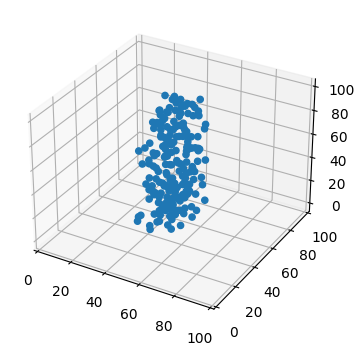

In [3]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha=1)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

In [4]:
original_data = np.column_stack((x, y, z))
#normalization
original_data = (original_data - original_data.min()) / (original_data.max() - original_data.min())

In [5]:
each_feature_mean = original_data.mean(axis=0)

In [6]:
#mean centering
original_data = original_data - each_feature_mean

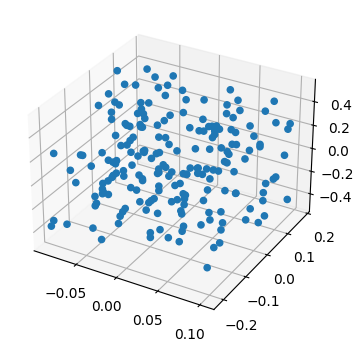

In [7]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(original_data[:, 0], original_data[:, 1], original_data[:, 2], alpha=1)
plt.show()

In [8]:
covariance_matrix = np.dot(original_data.T, original_data)/original_data.shape[0]
covariance_matrix

array([[ 3.43336394e-03, -7.26864606e-05,  1.88066524e-03],
       [-7.26864606e-05,  1.34386185e-02, -9.98816447e-04],
       [ 1.88066524e-03, -9.98816447e-04,  8.90576880e-02]])

In [9]:
eigen_value, eigen_vectore = np.linalg.eig(covariance_matrix)

In [10]:
(eigen_value/eigen_value.sum())*100

array([84.12392307,  3.20195466, 12.67412227])

In [11]:
feature_vectore = eigen_vectore[:, [0, 2]]

In [12]:
new_data = np.dot(feature_vectore.T, original_data.T)

In [13]:
final_data = new_data.T

(200, 2)

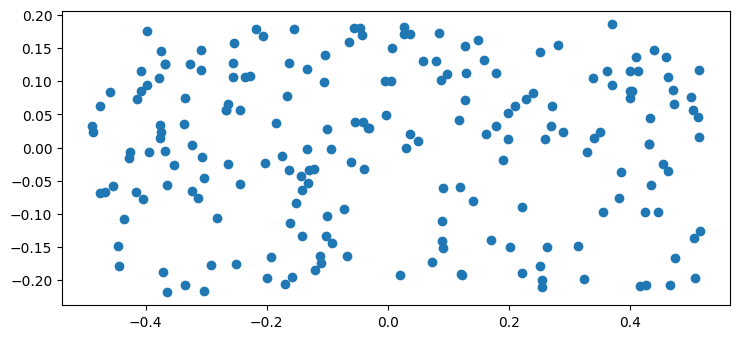

In [14]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
# Scatter plot
plt.scatter(final_data[:, 0], final_data[:, 1])
# Display the plot
plt.show()